In [56]:
import numpy as np        
from scipy.integrate import solve_ivp              
import matplotlib.pyplot as plt 

In [57]:
g = 9.81
l = 0.05
a = 0.1
b = 0.1

phi_10 = 0.05
phi_20 = 0.05
phi_30 = 0.05
phi_40 = 0.05

beta = 0.03

M = 0.5
m = 0.001

hC = 0.07

# $$A\ddot{\theta}-B\dot{\theta}+C\theta-D=0$$

In [58]:
A = 7.7e-4
B = 7.53e-5
C = 1
D = 0.17

theta_and_theta_dot_0 = [0, 2]

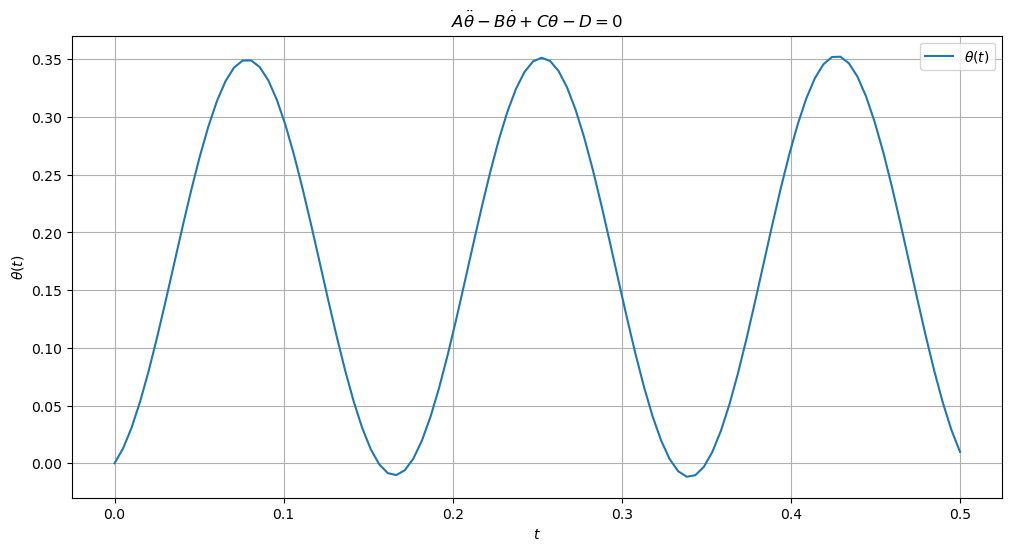

In [59]:
def Dense_Equation(t, theta_and_theta_dot):
    theta, theta_dot = theta_and_theta_dot
    theta_ddot = 1/A*(B*theta_dot-C*theta+D)
    return [theta_dot, theta_ddot]

t_span = (0, 0.5)
t_eval = np.linspace(t_span[0], t_span[1], 100)

sol = solve_ivp(Dense_Equation, t_span, theta_and_theta_dot_0, t_eval=t_eval)

plt.figure(figsize=(12, 6))
plt.plot(sol.t, sol.y[0], label=r'$\theta(t)$')
plt.title(r'$A\ddot{\theta}-B\dot{\theta}+C\theta-D=0$')
plt.xlabel('$t$')
plt.ylabel(r'$\theta(t)$')
plt.legend()
plt.grid(True)
plt.show()

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 710
     njev: 0
      nlu: 0
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x00000135C9138D08>
   status: 0
  success: True
        t: array([0.00000000e+00, 4.99750124e-04, 1.26774067e-03, 8.94764617e-03,
       2.04142202e-02, 3.28090233e-02, 4.51508951e-02, 5.68393245e-02,
       5.78661735e-02, 5.88930225e-02, 5.98913444e-02, 6.83494981e-02,
       7.99390215e-02, 9.25005565e-02, 1.04407880e-01, 1.16120076e-01,
       1.17440328e-01, 1.18633649e-01, 1.27222141e-01, 1.38830263e-01,
       1.51440703e-01, 1.63196939e-01, 1.74918769e-01, 1.77415700e-01,
       1.79689452e-01, 1.89575609e-01, 2.01355908e-01, 2.12931954e-01,
       2.24185353e-01, 2.29631737e-01, 2.31904013e-01, 2.32872506e-01,
       2.33840999e-01, 2.34796015e-01, 2.43141198e-01, 2.54709987e-01,
       2.67257865e-01, 2.79175373e-01, 2.90886266e-01, 2.92235248e-01,
       2.93460107e-01, 3.02201814e-01, 3.1383

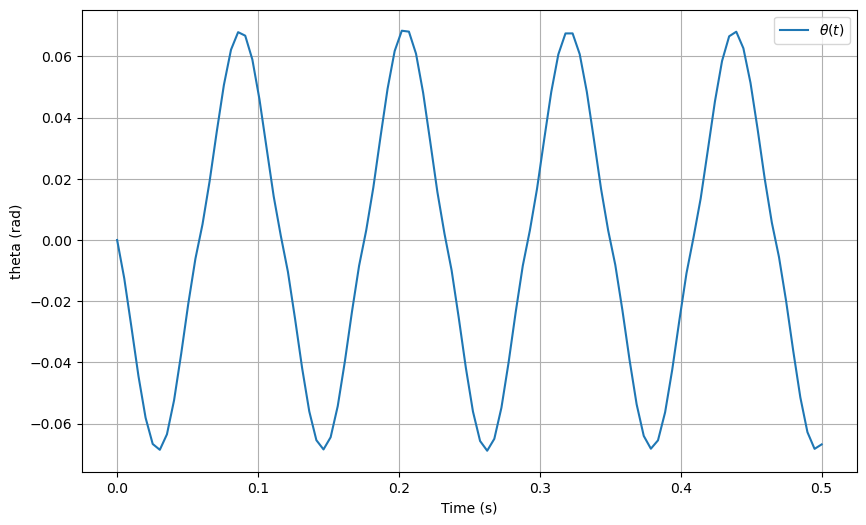

In [60]:
A = 7.7e-4
B = 7.53e-5
C = 5.6
D = 0.17


theta_and_theta_dot_0 = [0, -2]

def Dense_Equation(t, theta_and_theta_dot):
    theta, theta_dot = theta_and_theta_dot
    theta_ddot = 1/A*(B*theta_dot-C*theta+D*np.sign(theta))
    return [theta_dot, theta_ddot]


def monitor(t, theta_and_theta_dot):
    theta, theta_dot = theta_and_theta_dot
    return theta
#monitor.terminal = True
monitor.direction = 0

t_span = [0, 0.5]
times = np.array([])
thetas = np.array([])
theta_dots = np.array([])

while True:
    sol = solve_ivp(Dense_Equation, t_span, theta_and_theta_dot_0, events=monitor, dense_output=True, max_step=0.05)
    print(sol)
    t = np.linspace(sol.t[0], sol.t[-1], num=100)
    theta_and_theta_dot = sol.sol(t)
    times = np.concatenate((times, t))
    thetas = np.concatenate((thetas, theta_and_theta_dot[0]))
    theta_dots = np.concatenate((theta_dots, theta_and_theta_dot[1]))

    if sol.status == 1:
        new_theta = 1e-5 * np.sign(theta_and_theta_dot_0[0])
        new_theta_dot = 2 * np.sign(theta_and_theta_dot_0[1])
        if times[-1] > 0.5:
            break
        theta_and_theta_dot_0 = [new_theta, new_theta_dot]
        t_span[0] = sol.t_events[0][0] - 1e-5
    else:
        break

plt.figure(figsize=(10, 6))
plt.plot(times, thetas, label=r'$\theta(t)$')
plt.xlabel('Time (s)')
plt.ylabel('theta (rad)')
plt.legend()
plt.grid(True)
plt.show()
